In [1]:
%matplotlib inline
from pyvww.utils import VisualWakeWords
import numpy as np
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='..'
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
vww = VisualWakeWords(annFile)

loading annotations into memory...
Done (t=0.35s)
creating index...
index created!


In [4]:
# display Visual Wake Words categories and supercategories
cats = vww.loadCats(vww.getCatIds())
nms=[cat['name'] for cat in cats]
print('Visual Wake Words categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('Visual Wake Words supercategories: \n{}'.format(' '.join(nms)))

Visual Wake Words categories: 
not-person person

Visual Wake Words supercategories: 
background person


In [5]:
# get all images containing given categories, select one at random
catIds = vww.getCatIds(catNms=['person','dog','skateboard']);
imgIds = vww.getImgIds(catIds=catIds );
imgIds = vww.getImgIds(imgIds = [324158])
img = vww.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

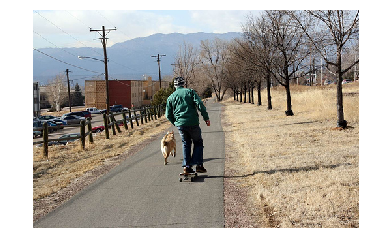

In [6]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

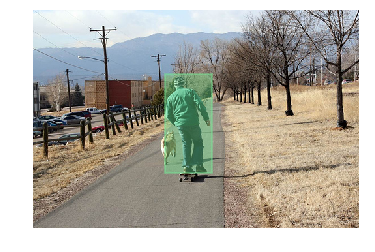

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = vww.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = vww.loadAnns(annIds)
vww.showAnns(anns)